# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [2]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [3]:
%pip install --upgrade plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 49.2 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


### Import Statements

In [4]:
%pip install country-converter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 2.9 MB/s eta 0:00:00


In [5]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import country_converter as coco

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [6]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [7]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [8]:
df_data.shape

(4324, 9)

In [9]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [10]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [11]:
df_data.isna().values.any()

True

In [12]:
df_data.duplicated().values.any()

False

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [13]:
df_data.isna().sum()
df_data_clean = df_data.dropna()

In [14]:
df_data_clean.isna().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
Organisation,0
Location,0
Date,0
Detail,0
Rocket_Status,0
Price,0
Mission_Status,0


## Descriptive Statistics

In [15]:
df_data_clean.describe()

,Unnamed: 0.1,Unnamed: 0
count,964.00,964.00
mean,858.49,858.49
std,784.21,784.21
min,0.00,0.00
25%,324.75,324.75
50%,660.50,660.50
75%,"1,112.00","1,112.00"
max,"4,020.00","4,020.00"


In [16]:
df_data_clean

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success
...,...,...,...,...,...,...,...,...,...
3855,3855,3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Fri Jul 29, 1966 18:43 UTC",Titan IIIB | KH-8,StatusRetired,59.0,Success
3971,3971,3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu May 06, 1965 15:00 UTC",Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success
3993,3993,3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Feb 11, 1965 15:19 UTC",Titan IIIA | LES 1,StatusRetired,63.23,Success
4000,4000,4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Dec 10, 1964 16:52 UTC",Titan IIIA | Transtage 2,StatusRetired,63.23,Success


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [17]:
df_data_clean.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [18]:
launches_per_company = df_data_clean.Organisation.value_counts()
v_bar = px.bar(
        x = launches_per_company.index,
        y = launches_per_company.values,
        color = launches_per_company.values,
        color_continuous_scale='Aggrnyl',
        title='Number of Launches per Company')

v_bar.update_layout(xaxis_title='Company',
                    coloraxis_showscale=False,
                    yaxis_title='Number of Launches')
v_bar.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [19]:
df_data_clean.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success


In [20]:
len(df_data_clean[df_data_clean.Rocket_Status == 'StatusActive'])

586

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [21]:
len(df_data_clean[df_data_clean.Mission_Status == 'Success'])

910

In [22]:
len(df_data_clean[df_data_clean.Mission_Status != 'Success'])

54

# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

In [23]:
df_data_clean['Price']

,Price
0,50.0
1,29.75
3,65.0
4,145.0
5,64.68
...,...
3855,59.0
3971,63.23
3993,63.23
4000,63.23


In [24]:
hist = px.histogram(df_data_clean.Price.values,
                   x=df_data_clean.Price.index,
                   nbins=30,
                   opacity=0.8)

hist.update_layout(xaxis_title='Index',
                   yaxis_title='Price',)

hist.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [25]:
# Custom mapping for exceptions
country_exceptions = {
    "Russia": "Russian Federation",
    "New Mexico": "United States",
    "Yellow Sea": "China",
    "Shahrud Missile Test Site": "Iran",
    "Pacific Missile Range Facility": "United States",
    "Barents Sea": "Russian Federation",
    "Gran Canaria": "United States"
}

# Function to extract country name and apply exceptions
def get_iso_code(location):
    # Extract country name (assuming it's the last part of the location string)
    country_name = location.split(",")[-1].strip()

    # Apply exceptions if the country name matches
    country_name = country_exceptions.get(country_name, country_name)

    # Convert to ISO3 format
    return coco.convert(names=country_name, to="ISO3")

# Apply the function to create a new column
df_data_clean["ISO_Country"] = df_data_clean["Location"].apply(get_iso_code)
df_data_clean.ISO_Country

<ipython-input-25-08becb1149da>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ISO_Country
0,USA
1,CHN
3,KAZ
4,USA
5,CHN
...,...
3855,USA
3971,USA
3993,USA
4000,USA


In [26]:
df_data_clean

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,ISO_Country
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,KAZ
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,CHN
...,...,...,...,...,...,...,...,...,...,...
3855,3855,3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Fri Jul 29, 1966 18:43 UTC",Titan IIIB | KH-8,StatusRetired,59.0,Success,USA
3971,3971,3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu May 06, 1965 15:00 UTC",Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success,USA
3993,3993,3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Feb 11, 1965 15:19 UTC",Titan IIIA | LES 1,StatusRetired,63.23,Success,USA
4000,4000,4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Dec 10, 1964 16:52 UTC",Titan IIIA | Transtage 2,StatusRetired,63.23,Success,USA


In [27]:
df_countries = df_data_clean.loc[:, ["ISO_Country"]].copy()
df_countries = df_countries["ISO_Country"].value_counts().reset_index()
df_countries.columns = ["ISO_Country", "Count"]
df_countries

,ISO_Country,Count
0,USA,490
1,CHN,159
2,FRA,95
3,IND,67
4,RUS,54
5,KAZ,46
6,JPN,40
7,NZL,13


In [28]:
world_map = px.choropleth(df_countries,
                          locations='ISO_Country',
                          color='Count',
                          color_continuous_scale=px.colors.sequential.matter)

world_map.update_layout(coloraxis_showscale=True,)

world_map.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [29]:
failure_counts = df_data_clean[df_data_clean.Mission_Status == 'Failure']
failure_counts
df_failure = failure_counts.groupby(['ISO_Country'],as_index=False).agg({'Mission_Status':pd.Series.count})
df_failure.sort_values('Mission_Status', ascending=False)


,ISO_Country,Mission_Status
6,USA,20
2,IND,5
0,CHN,4
1,FRA,2
3,KAZ,2
4,NZL,2
5,RUS,1


In [30]:
world_map = px.choropleth(df_failure,
                          locations='ISO_Country',
                          color='Mission_Status',
                          color_continuous_scale=px.colors.sequential.matter)

world_map.update_layout(coloraxis_showscale=True,)

world_map.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [31]:
df_sunburst = df_data_clean[["ISO_Country", "Organisation", "Mission_Status"]]
df_sunburst_counts = df_sunburst.groupby(["ISO_Country", "Organisation", "Mission_Status"]).size().reset_index(name="Count")
df_sunburst

,ISO_Country,Organisation,Mission_Status
0,USA,SpaceX,Success
1,CHN,CASC,Success
3,KAZ,Roscosmos,Success
4,USA,ULA,Success
5,CHN,CASC,Success
...,...,...,...
3855,USA,US Air Force,Success
3971,USA,US Air Force,Success
3993,USA,US Air Force,Success
4000,USA,US Air Force,Success


In [32]:
burst = px.sunburst(df_sunburst_counts,
                          path=["ISO_Country", "Organisation", "Mission_Status"],
                          values="Count",
                          color="Mission_Status",
                          color_discrete_map={"Success": "green", "Failure": "red"}
                   )

burst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [33]:
df_data_clean.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status', 'ISO_Country'],
      dtype='object')

In [34]:
df_data_clean['Price'] = pd.to_numeric(df_data_clean['Price'], errors='coerce')

total_spent_by_org = df_data_clean.groupby('Organisation')['Price'].sum().reset_index()
total_spent_by_org

<ipython-input-34-65916d7bc7b2>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Organisation,Price
0,Arianespace,"16,345.00"
1,Boeing,"1,241.00"
2,CASC,"6,340.26"
3,EER,20.00
4,ESA,37.00
5,Eurockot,543.40
6,ExPace,28.30
7,ILS,"1,320.00"
8,ISRO,"2,177.00"
9,JAXA,168.00


# Analyse the Amount of Money Spent by Organisation per Launch

In [35]:
merged_df = total_spent_by_org.merge(launches_per_company, on="Organisation")
merged_df["Money per Launch"] = merged_df["Price"] / merged_df["count"]
merged_df

,Organisation,Price,count,Money per Launch
0,Arianespace,"16,345.00",96,170.26
1,Boeing,"1,241.00",7,177.29
2,CASC,"6,340.26",158,40.13
3,EER,20.00,1,20.00
4,ESA,37.00,1,37.00
5,Eurockot,543.40,13,41.80
6,ExPace,28.30,1,28.30
7,ILS,"1,320.00",13,101.54
8,ISRO,"2,177.00",67,32.49
9,JAXA,168.00,3,56.00


# Chart the Number of Launches per Year

In [36]:
df_data_clean.Date

,Date
0,"Fri Aug 07, 2020 05:12 UTC"
1,"Thu Aug 06, 2020 04:01 UTC"
3,"Thu Jul 30, 2020 21:25 UTC"
4,"Thu Jul 30, 2020 11:50 UTC"
5,"Sat Jul 25, 2020 03:13 UTC"
...,...
3855,"Fri Jul 29, 1966 18:43 UTC"
3971,"Thu May 06, 1965 15:00 UTC"
3993,"Thu Feb 11, 1965 15:19 UTC"
4000,"Thu Dec 10, 1964 16:52 UTC"


# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

<ipython-input-37-16c8692232ff>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-37-16c8692232ff>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



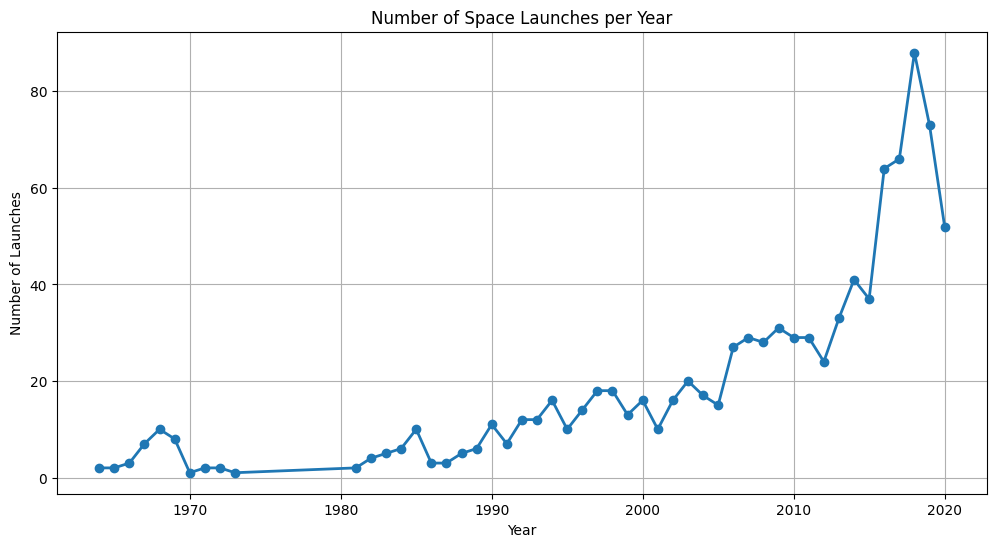

In [37]:
# Ensure the 'Date' column is in datetime format
df_data_clean["Date"] = pd.to_datetime(df_data_clean["Date"], errors='coerce')

# Extract the year from the date
df_data_clean["Year"] = df_data_clean["Date"].dt.year

# Count the number of launches per year
launches_per_year = df_data_clean["Year"].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(launches_per_year.index, launches_per_year.values, marker='o', linestyle='-', linewidth=2)
plt.xlabel("Year")
plt.ylabel("Number of Launches")
plt.title("Number of Space Launches per Year")
plt.grid(True)

# Display the chart
plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

<ipython-input-38-47f9d85c46f3>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



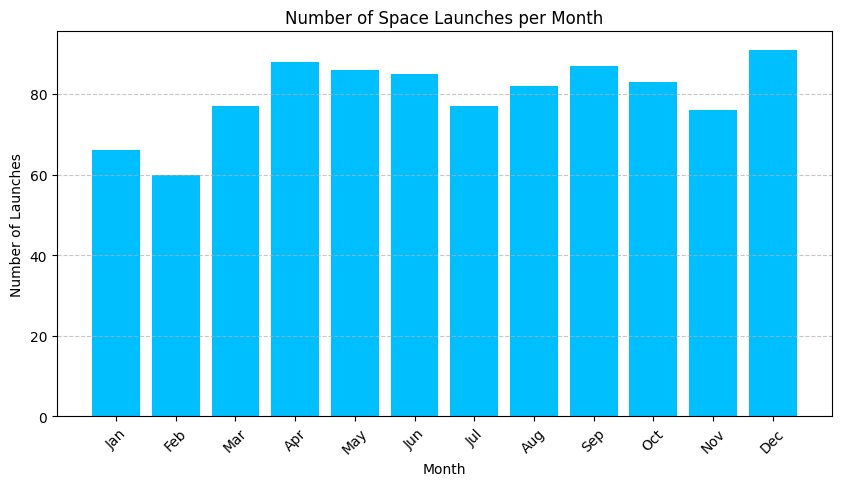

In [38]:
# Extract the month
df_data_clean["Month"] = df_data_clean["Date"].dt.month

# Count the number of launches per month
launches_per_month = df_data_clean["Month"].value_counts().sort_index()

# Define month names for better readability
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Plot the results
plt.figure(figsize=(10, 5))
plt.bar(month_names, launches_per_month, color='deepskyblue')
plt.xlabel("Month")
plt.ylabel("Number of Launches")
plt.title("Number of Space Launches per Month")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Display the chart
plt.show()

# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

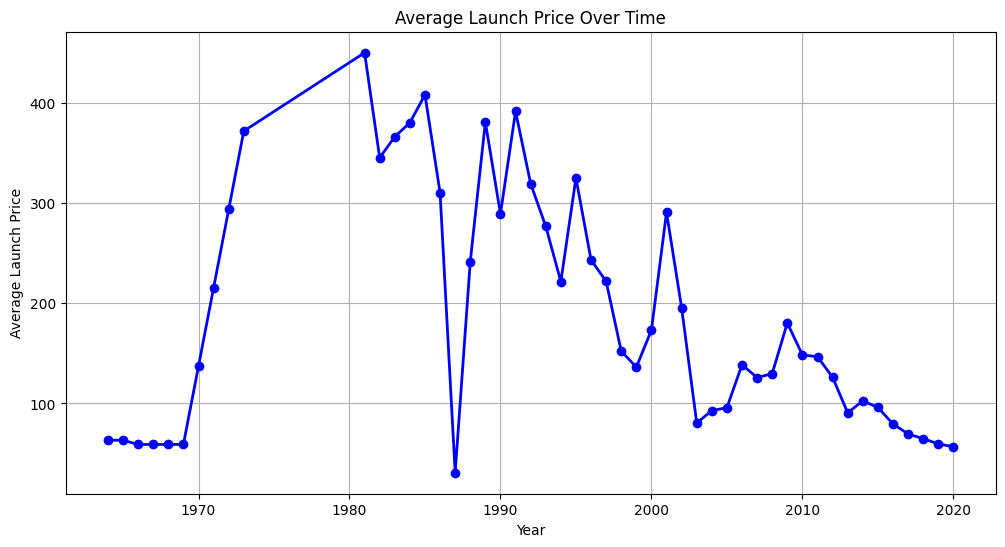

In [39]:
# Group by year and compute the average launch price
avg_price_per_year = df_data_clean.groupby("Year")["Price"].mean()


# Convert year index to integer (removing float formatting)
avg_price_per_year.index = avg_price_per_year.index.astype(int)

# Fill missing values (optional: use interpolation or forward fill)
avg_price_per_year = avg_price_per_year.interpolate()  # Linear interpolation

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(avg_price_per_year.index, avg_price_per_year.values, marker='o', linestyle='-', linewidth=2, color="blue")
plt.xlabel("Year")
plt.ylabel("Average Launch Price")
plt.title("Average Launch Price Over Time")
plt.grid(True)

# Display the chart
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [40]:
# Count total launches per organization
top_10_orgs = df_data_clean["Organisation"].value_counts().head(10).index

# Filter data to include only the top 10 organizations
df_top_orgs = df_data_clean[df_data_clean["Organisation"].isin(top_10_orgs)]

# Count the number of launches per year for each organization
launches_per_year_org = df_top_orgs.groupby(["Year", "Organisation"]).size().unstack().fillna(0)



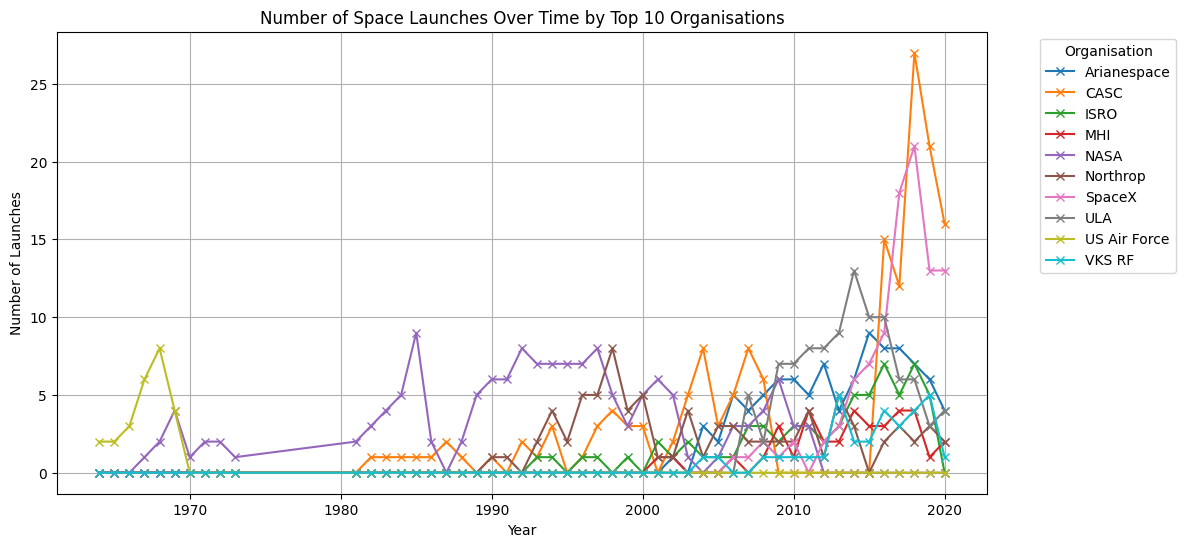

In [41]:
# Plot the data
plt.figure(figsize=(12, 6))
for org in launches_per_year_org.columns:
    plt.plot(launches_per_year_org.index, launches_per_year_org[org], marker='x', linestyle='-', label=org)

plt.xlabel("Year")
plt.ylabel("Number of Launches")
plt.title("Number of Space Launches Over Time by Top 10 Organisations")
plt.legend(title="Organisation", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Display the chart
plt.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [42]:
# Apply the function to create a new column
df_data["ISO_Country"] = df_data["Location"].apply(get_iso_code)
df_data.ISO_Country

# Ensure 'Date' column is in datetime format
df_data["Date"] = pd.to_datetime(df_data["Date"], errors='coerce')

# Extract year
df_data["Year"] = df_data["Date"].dt.year

# Filter for Cold War period (before 1991)
df_cold_war = df_data[df_data["Year"] < 1991]


In [43]:
df_cold_war.tail()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,ISO_Country,Year
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,"1,958.00"
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,USA,"1,958.00"
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,"1,957.00"
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,KAZ,"1,957.00"
4323,4323,4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04 19:28:00+00:00,Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success,KAZ,"1,957.00"


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [44]:
# Define country mappings
ussr_countries = ["RUS", "KAZ"]  # Include Soviet launch sites
usa_countries = ["USA"]

# Count the number of launches for USA and USSR
usa_launches = df_cold_war[df_cold_war["ISO_Country"].isin(usa_countries)].shape[0]
ussr_launches = df_cold_war[df_cold_war["ISO_Country"].isin(ussr_countries)].shape[0]

# Create a DataFrame for plotting
launch_data = pd.DataFrame({
    "Country": ["USA", "USSR"],
    "Launches": [usa_launches, ussr_launches]
})
launch_data

,Country,Launches
0,USA,626
1,USSR,1682


In [45]:
# Create a Plotly Pie Chart
fig = px.pie(launch_data, names="Country", values="Launches", title="USA vs USSR Space Launches (Cold War Era)")
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [46]:
# Count the number of launches per year for USA and USSR
launches_usa = df_cold_war[df_cold_war["ISO_Country"].isin(usa_countries)].groupby("Year").size()
launches_ussr = df_cold_war[df_cold_war["ISO_Country"].isin(ussr_countries)].groupby("Year").size()



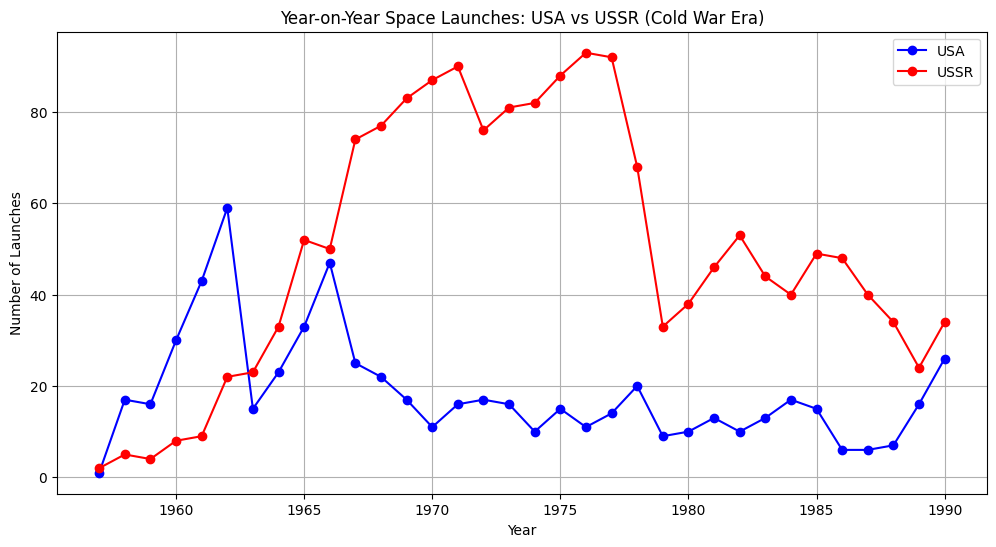

In [47]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(launches_usa.index, launches_usa.values, marker='o', linestyle='-', label="USA", color="blue")
plt.plot(launches_ussr.index, launches_ussr.values, marker='o', linestyle='-', label="USSR", color="red")

plt.xlabel("Year")
plt.ylabel("Number of Launches")
plt.title("Year-on-Year Space Launches: USA vs USSR (Cold War Era)")
plt.legend()
plt.grid(True)

# Display the chart
plt.show()

## Chart the Total Number of Mission Failures Year on Year.

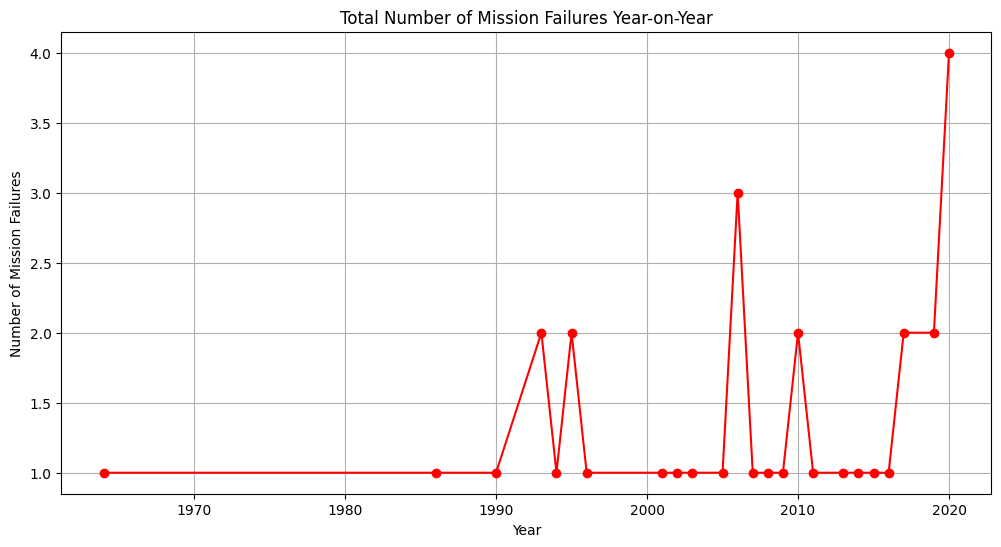

In [50]:
# Filter dataset for mission failures
df_failures = df_data_clean[df_data_clean["Mission_Status"] == "Failure"]

# Count the number of failures per year
failures_per_year = df_failures["Year"].value_counts().sort_index()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(failures_per_year.index, failures_per_year.values, marker='o', linestyle='-', color="red")

plt.xlabel("Year")
plt.ylabel("Number of Mission Failures")
plt.title("Total Number of Mission Failures Year-on-Year")
plt.grid(True)

# Display the chart
plt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

In [57]:
# Count total launches per year
total_launches_per_year =  df_data_clean['Year'].value_counts().sort_index()

# Count mission failures per year
failures_per_year = df_data_clean[df_data_clean["Mission_Status"] == "Failure"]["Year"].value_counts().sort_index()

# Calculate failure percentage per year
failure_percentage = (failures_per_year / total_launches_per_year) * 100

failure_percentage = failure_percentage.interpolate()

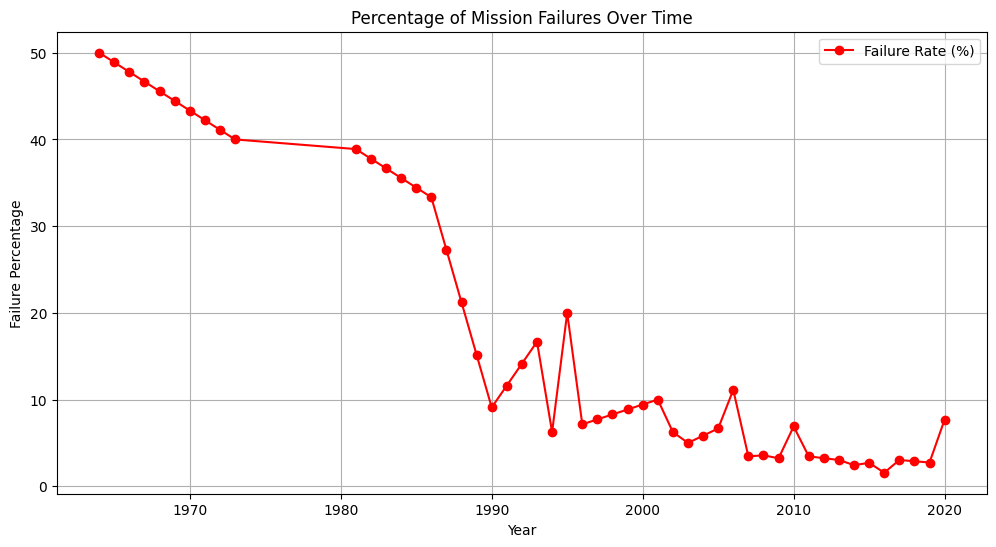

In [58]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(failure_percentage.index, failure_percentage.values, marker='o', linestyle='-', color="red", label="Failure Rate (%)")

plt.xlabel("Year")
plt.ylabel("Failure Percentage")
plt.title("Percentage of Mission Failures Over Time")
plt.legend()
plt.grid(True)

# Display the chart
plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [59]:
# Filter dataset for launches up to and including 2020
df_filtered = df_data_clean[df_data_clean["Year"] <= 2020]

# Count the total launches per country per year
total_launches = df_filtered.groupby(["Year", "ISO_Country"]).size().unstack()

# Identify the country with the most launches per year
leading_country_per_year = total_launches.idxmax(axis=1)

# Now filter only successful launches
df_successful = df_filtered[df_filtered["Mission_Status"] == "Success"]

# Count successful launches per country per year
successful_launches = df_successful.groupby(["Year", "ISO_Country"]).size().unstack()

# Identify the leading country per year for successful launches
leading_country_success_per_year = successful_launches.idxmax(axis=1)

# Combine both results into a DataFrame
comparison_df = pd.DataFrame({
    "Leading Country (Total Launches)": leading_country_per_year,
    "Leading Country (Successful Launches)": leading_country_success_per_year
})

comparison_df

,Leading Country (Total Launches),Leading Country (Successful Launches)
Year,,
"1,964.00",USA,USA
"1,965.00",USA,USA
"1,966.00",USA,USA
"1,967.00",USA,USA
"1,968.00",USA,USA
"1,969.00",USA,USA
"1,970.00",USA,USA
"1,971.00",USA,USA
"1,972.00",USA,USA


# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [60]:
# Count total launches per organization per year
launches_per_year_org = df_data_clean.groupby(["Year", "Organisation"]).size().unstack().fillna(0)

# Identify the organization with the most launches per year
dominant_org_per_year = launches_per_year_org.idxmax(axis=1)


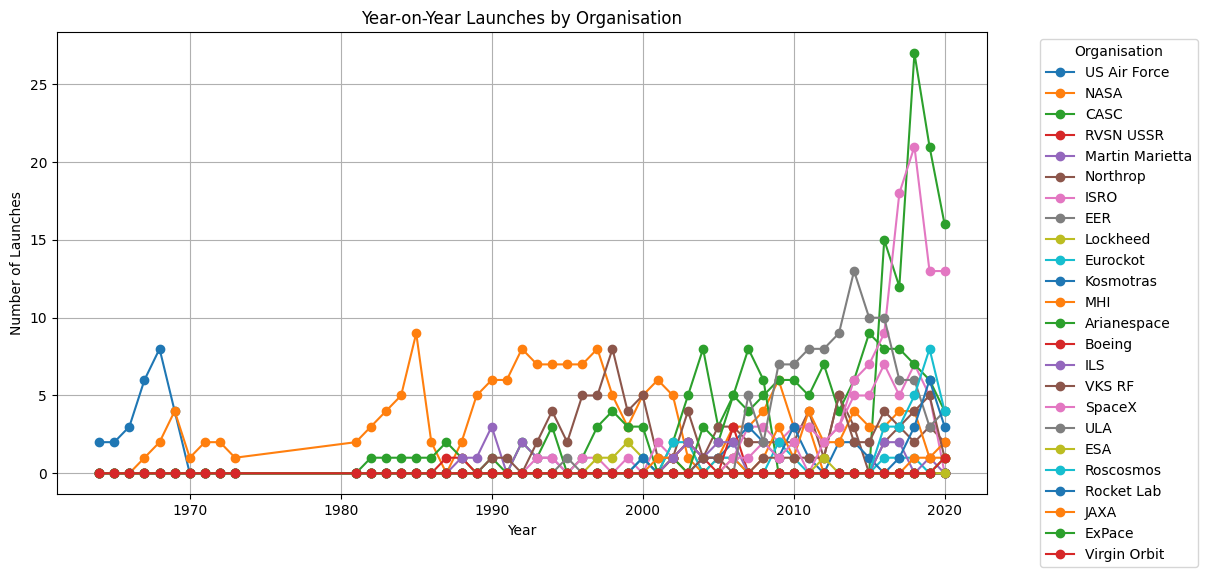

In [61]:
# Plot the results
plt.figure(figsize=(12, 6))
for org in launches_per_year_org.columns:
    plt.plot(launches_per_year_org.index, launches_per_year_org[org], linestyle='-', marker='o', label=org)

plt.xlabel("Year")
plt.ylabel("Number of Launches")
plt.title("Year-on-Year Launches by Organisation")
plt.legend(title="Organisation", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Display the chart
plt.show()

In [64]:
# Create a DataFrame showing the dominant organization each year
dominant_org_df = pd.DataFrame({
    "Year": dominant_org_per_year.index,
    "Dominant Organisation": dominant_org_per_year.values
})

# Display the dominant organization for the 1970s, 1980s, and recent years
dominant_org_recent = dominant_org_df[dominant_org_df["Year"].isin([2018, 2019, 2020])]
dominant_org_historical = dominant_org_df[(dominant_org_df["Year"] >= 1970) & (dominant_org_df["Year"] < 1990)]

dominant_org_recent

,Year,Dominant Organisation
47,"2,018.00",CASC
48,"2,019.00",CASC
49,"2,020.00",CASC
